# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle0](https://github.com/Yasmeen-Begum/Udacity/assets/91931504/c38b3dd9-2d61-40aa-89d6-da10c98e2a5a)
![kaggle1](https://github.com/Yasmeen-Begum/Udacity/assets/91931504/9fa2046d-b5d7-4c99-a96c-42bebaca7163)
2. Scroll down to API and click Create New API Token.
![kaggle2](https://github.com/Yasmeen-Begum/Udacity/assets/91931504/06e8a91d-0953-4a50-b4d7-1cdbd537b7d9)
![kaggle3](https://github.com/Yasmeen-Begum/Udacity/assets/91931504/bb533bbf-9be3-437e-ad4e-3073ad412e01)
3. Open up `kaggle.json` and use the username and key.
![kaggle4](https://github.com/Yasmeen-Begum/Udacity/assets/91931504/3745124b-78d4-477b-baad-086ada2310ef)


## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 36.0 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 25.6 MB/s eta 0:00:00:00:0100:01
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080016 sha256=c42f87fd3abbff73eab252c8442c33c9da6fc0ab81fcbec458d0dd167458350e
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.4.1
    Uninstalling bokeh-3.4.1:
      Successfully uninstalled bokeh-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.4.1 requires bokeh<3.5.0,>=3.4.0, but you have bokeh 2.0.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 265.4 MB/s eta 0:00:00
   

### Setup Kaggle API Key

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle5](https://github.com/Yasmeen-Begum/Udacity/assets/91931504/f69ef93a-5085-4d1d-a246-6c8f10b49220)

In [7]:
!pip install -q Kaggle

# Upload Kaggle API token (json file) -- (Uncomment) Only for Google Colab (For AWS Sagemaker upload 'kaggle.json')
# from google.colab import files
# files.upload()

# create a kaggle directory
!mkdir ~/.kaggle          # (-----------------------------------------   Uncomment - For first time only)

# copy 'kaggle.json' (Kaggle API Token) to the folder we have created
!cp kaggle.json ~/.kaggle/

# Authorize permissions for the json to act
!chmod 600 ~/.kaggle/kaggle.json

# Download the Bike Sharing Demand dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand

# # Unzip Dataset (Over-write to avoid error, if the dataset pre-exists)
!unzip -o bike-sharing-demand.zip    # -o: over-writes if the file pre-exists

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 4.68MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [8]:
!pip install --upgrade autogluon

In [9]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor

In [10]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train.loc[:, "datetime"] = pd.to_datetime(train.loc[:, "datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [12]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [13]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.loc[:, "datetime"] = pd.to_datetime(test.loc[:, "datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [14]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.loc[:, "datetime"] = pd.to_datetime(submission.loc[:, "datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [15]:
predictor = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error",
                             learner_kwargs={'ignored_columns': ['casual','registered']} ).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240511_163201"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240511_163201/ds_sub_fit/sub_fit_ho.
2024-05-11 16:32:01,993	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.

### Review AutoGluon's training run with ranking of models that did the best.

In [16]:
 predictor = TabularPredictor.load("AutogluonModels/ag-20240511_163201")

In [17]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.012301  root_mean_squared_error      16.329328  395.518243                0.000773           0.038774            3       True         13
1   RandomForestMSE_BAG_L2  -53.343573  root_mean_squared_error      12.614359  320.909430                0.796342          34.763985            2       True         12
2          LightGBM_BAG_L2  -54.874852  root_mean_squared_error      12.025141  309.142195                0.207124          22.996749            2       True         11
3        LightGBMXT_BAG_L2  -60.515855  root_mean_squared_error      15.325089  337.718735                3.507072          51.573289            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.063470    0.055367   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.70944693718639

In [19]:
# Generate the leaderboard
leaderboard = predictor.leaderboard()

# Retrieve the best model
best_model_name = leaderboard.iloc[0]['model']
#best_model_name
best_model =predictor.model_best
best_model

'WeightedEnsemble_L3'

<Axes: xlabel='model'>

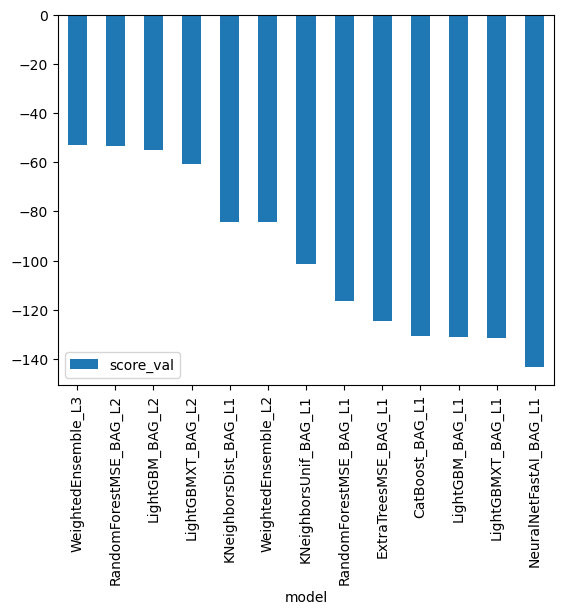

In [20]:
#Visualizing output
predictor.leaderboard(silent=True).plot(kind="bar",x="model",y="score_val")

### Create predictions from test dataset

In [21]:
predictions = np.rint(predictor.predict(test, model='WeightedEnsemble_L3')) # Rounding up since count of trips can't be float
predictions.head()

0    23.0
1    43.0
2    46.0
3    49.0
4    50.0
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [22]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.460037
std        89.617432
min         3.000000
25%        20.000000
50%        64.000000
75%       167.000000
max       369.000000
Name: count, dtype: float64

In [23]:
# How many negative values do we have?
sum(predictions < 0)

0

In [24]:
# Set them to zero
predictions[predictions<0] = 0
#confirmation
sum(predictions < 0)

0

### Set predictions to submission dataframe, save, and submit

In [25]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [26]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 161k/161k [00:00<00:00, 583kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [27]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 3

fileName                        date                 description                          status    publicScore  privateScore  
------------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission.csv                  2024-05-11 16:44:52  first raw submission                 complete  1.79833      1.79833       


#### Initial score of `1.79833`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

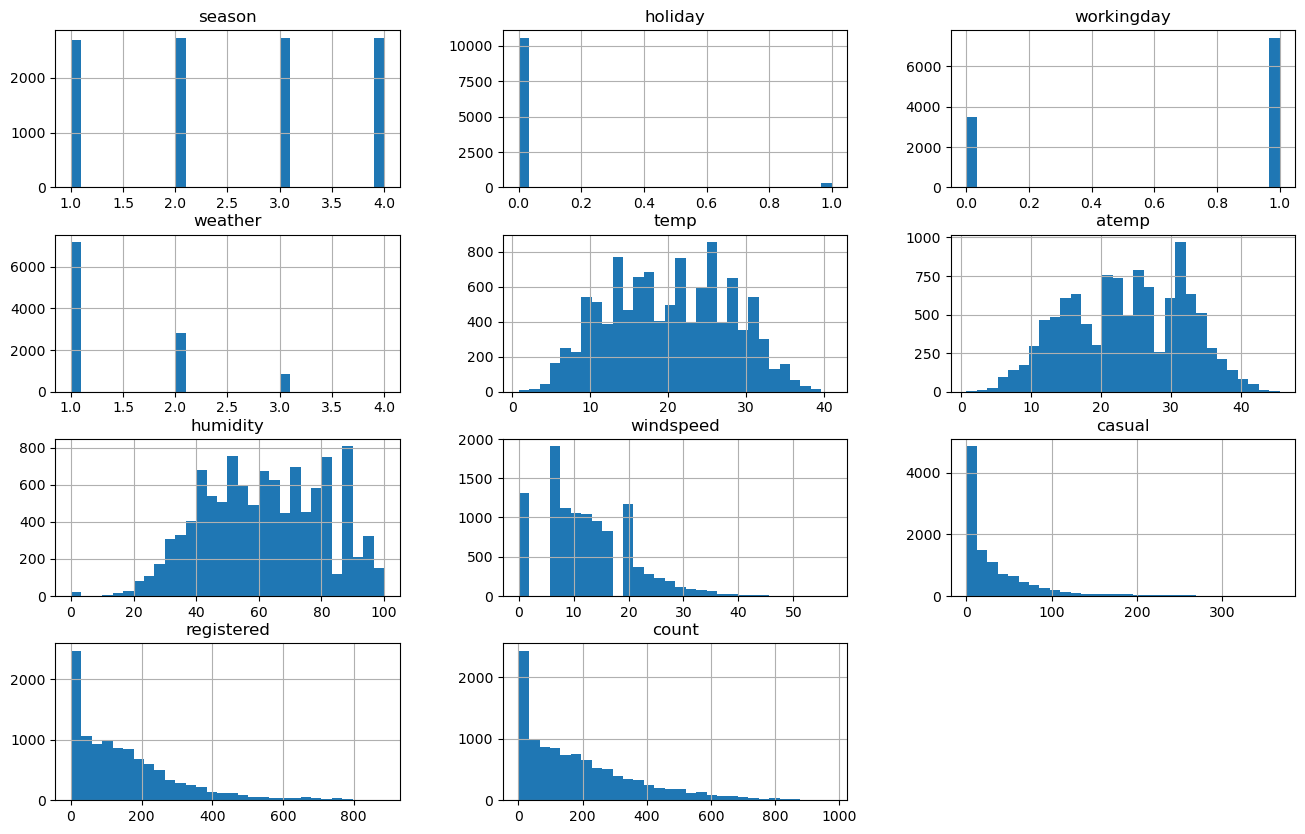

In [28]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(bins=30, figsize=(16,10))

In [29]:
train["datetime"] = pd.to_datetime(train["datetime"])
test["datetime"] = pd.to_datetime(test["datetime"])

# Now you can access the dt attribute
train["year"] = train.datetime.dt.year
train["month"] = train.datetime.dt.month
train["day"] = train.datetime.dt.day
train["hour"] = train.datetime.dt.hour
test["year"] = test.datetime.dt.year
test["month"] = test.datetime.dt.month
test["day"] = test.datetime.dt.day
test["hour"] = test.datetime.dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [30]:
train["season"] = train["season"].astype("category")
train["weather"] = train["season"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["season"].astype("category")

In [31]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

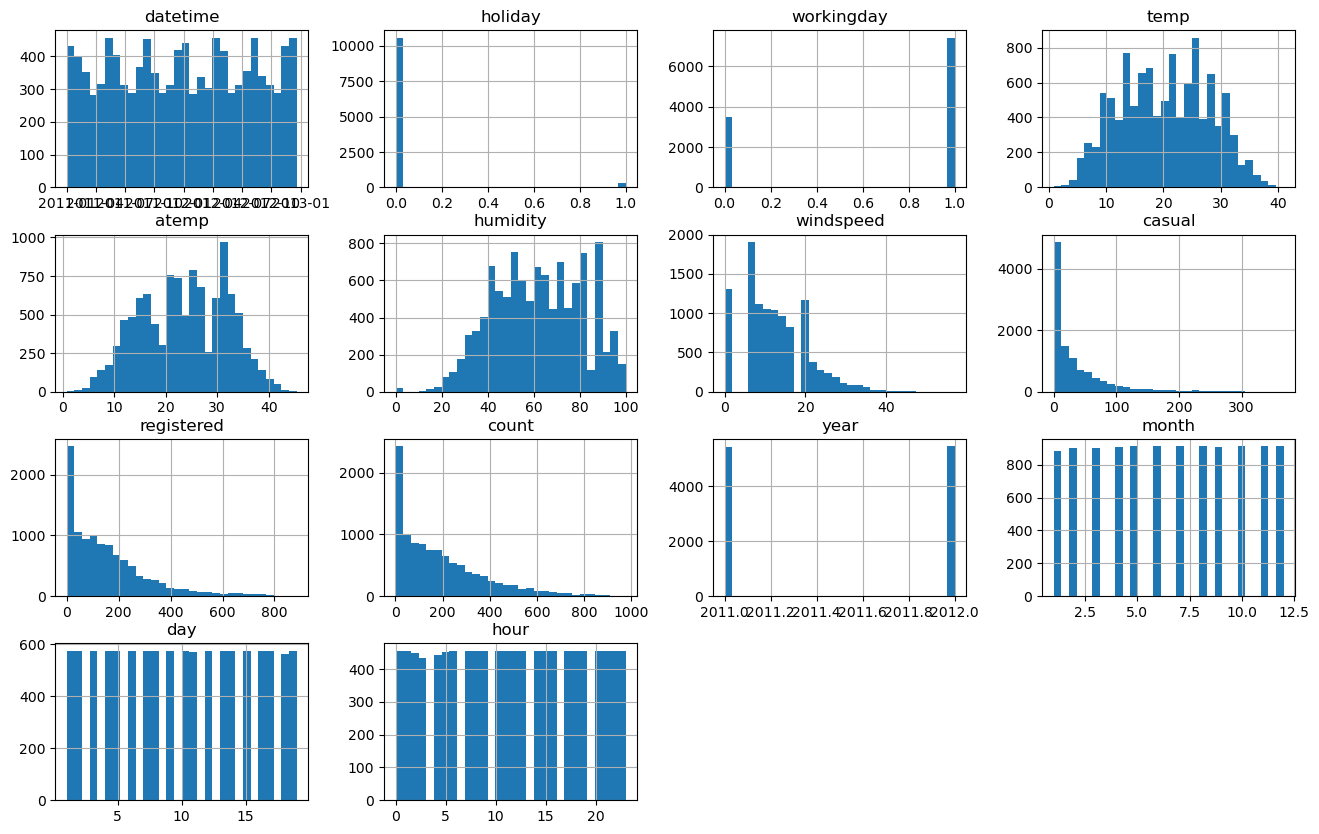

In [32]:
# View histogram of all features again now with the hour feature
train.hist(bins=30, figsize=(16,10))

## Step 5: Rerun the model with the same settings as before, just with more features

In [33]:
predictor_new_features = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error",
                                          learner_kwargs={'ignored_columns': ['casual','registered']}).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240511_164958"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240511_164958/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 178 seconds

In [34]:
# Assuming you have trained a model using AutoGluon and saved it as 'model_checkpoint'
predictor_new_features = TabularPredictor.load("AutogluonModels/ag-20240511_164958")

In [35]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.979329  root_mean_squared_error      25.173510  358.170658                0.000775           0.037431            3       True         13
1          LightGBM_BAG_L2  -31.367516  root_mean_squared_error      24.107361  288.744994                0.264383          25.056352            2       True         10
2          CatBoost_BAG_L2  -31.481300  root_mean_squared_error      23.915283  301.263717                0.072305          37.575076            2       True         12
3        LightGBMXT_BAG_L2  -31.819132  root_mean_squared_error      24.836047  295.501799                0.993069          31.813157            2       True          9
4   RandomForestMSE_BAG_L2  -32.836508  root_mean_squared_error      24.460247  298.510166   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -35.909392407015744,
  'LightGBM_BAG_L1': -35.30459607624602,
  'RandomForestMSE_BAG_L1': -40.71961730639684,
  'CatBoost_BAG_L1': -36.790099867553536,
  'ExtraTree

In [36]:
leaderboard = predictor_new_features.leaderboard()

# Retrieve the best model
best_model_name = leaderboard.iloc[0]['model']
best_model_name
# Now you can retrieve the best model using the model_best property
best_model = predictor_new_features.model_best
best_model

'WeightedEnsemble_L3'

<Axes: xlabel='model'>

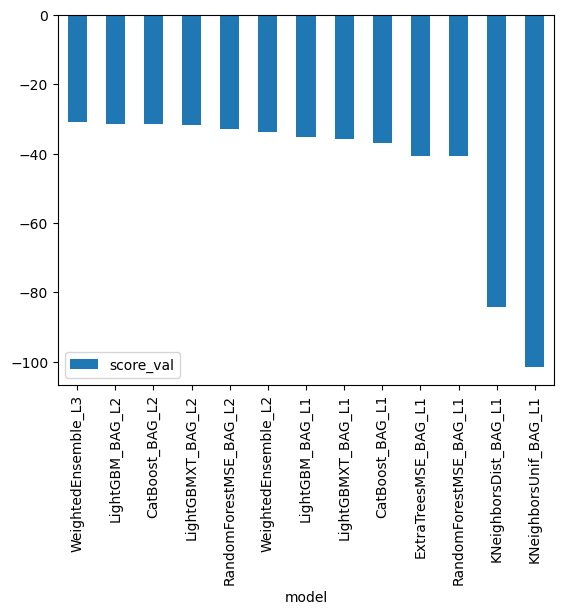

In [37]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar",x="model",y="score_val")

In [38]:
predictions_new_features = np.rint(predictor_new_features.predict(test))
predictions_new_features.describe()

count    6493.000000
mean      144.891571
std       126.441750
min         2.000000
25%        50.000000
50%       114.000000
75%       199.000000
max       804.000000
Name: count, dtype: float64

In [39]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features<0] = 0

In [40]:
# Same submitting predictions
submission["count"] = predictions_new_features
submission.to_csv("submission_new_features.csv", index=False)

In [41]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 162k/162k [00:00<00:00, 606kB/s]
Successfully submitted to Bike Sharing Demand

In [42]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 4

fileName                        date                 description                          status    publicScore  privateScore  
------------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_features.csv     2024-05-11 17:04:13  new features                         complete  0.70291      0.70291       
submission.csv                  2024-05-11 16:44:52  first raw submission                 complete  1.79833      1.79833       
tail: write error: Broken pipe


#### New Score of `0.70291`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [43]:
from autogluon.common import space

hyperparameters = {
    'NN_TORCH': [{}, {'activation': 'elu', 'dropout_prob': 0.10077639529843717, 'hidden_size': 108, 'learning_rate': 0.002735937344002146, 'num_layers': 4, 'use_batchnorm': True, 'weight_decay': 1.356433327634438e-12, 'ag_args': {'name_suffix': '_r79', 'priority': -2}}, {'activation': 'elu', 'dropout_prob': 0.11897478034205347, 'hidden_size': 213, 'learning_rate': 0.0010474382260641949, 'num_layers': 4, 'use_batchnorm': False, 'weight_decay': 5.594471067786272e-10, 'ag_args': {'name_suffix': '_r22', 'priority': -7}}],
    'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'] # Gradient Boosting Machine options
}

# Hyperparameter Tuning Configuration
hyperparameter_tune_kwargs = {
    "num_trials": 10,
    "scheduler": "local",
    "searcher": "auto"  # to tune hyperparameters using random search routine with a local scheduler
}
time_limit = 12 * 60

predictor_new_hpo = TabularPredictor(label="count",
                                      problem_type="regression",
                                      eval_metric="root_mean_squared_error",
                                      verbosity=1,
                                      learner_kwargs={
                                          "ignored_columns": ["casual", "registered", "month", "day", "hour"]
                                      }).fit(train_data=train, time_limit=time_limit, presets="best_quality",
                                             hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
                                             )


No path specified. Models will be saved in: "AutogluonModels/ag-20240511_170725"


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 1474, in hyperparameter_tune
    return self._hyperparameter_tune(hpo_executor=hpo_executor, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 184, in _hyperparameter_tune
    return super()._hyperparameter_tune(X=X, y=y, k_fold=k_fold, hpo_executor=hpo_executor, preprocess_kwargs=preprocess_kwargs, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 1391, in _hyperparameter_tune
    hpo_executor.execute(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/hpo/executors.py", line 408, in execute
    analysis = run(
  Fil

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 1474, in hyperparameter_tune
    return self._hyperparameter_tune(hpo_executor=hpo_executor, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 184, in _hyperparameter_tune
    return super()._hyperparameter_tune(X=X, y=y, k_fold=k_fold, hpo_executor=hpo_executor, preprocess_kwargs=preprocess_kwargs, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 1391, in _hyperparameter_tune
    hpo_executor.execute(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/hpo/executors.py", line 408, in execute
    analysis = run(
  Fil

In [44]:
predictor_new_hpo = TabularPredictor.load("AutogluonModels/ag-20240511_170725")

In [45]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3 -129.894453  root_mean_squared_error       0.763227  216.698476                0.000884           0.027182            3       True         10
1  LightGBMXT_BAG_L2/T1 -130.164037  root_mean_squared_error       0.616471  141.325707                0.000139          22.107080            2       True          5
2  LightGBMXT_BAG_L2/T2 -130.395205  root_mean_squared_error       0.616466  143.763682                0.000134          24.545055            2       True          6
3    LightGBM_BAG_L2/T1 -130.402799  root_mean_squared_error       0.616477  141.727805                0.000145          22.509178            2       True          7
4   WeightedEnsemble_L2 -130.693917  root_mean_squared_error       0.617255  119.241948                0.000

{'model_types': {'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1/T1': -132.89163175779123,
  'LightGBM_BAG_L1/T1': -132.49398174587796,
  'LightGBMLarge_BAG_L1': -131.45230081481827,
  'WeightedEnsemble_L2': -130.6939169400562,
  'LightGBMXT_BAG_L2/T1': -130.16403742312866,
  'LightGBMXT_BAG_L2/T2': -130.39520534885136,
  'LightGBM_BAG_L2/T1': -130.40279889912995,
  'LightGBM_BAG_L2/T2': -131.1814534470368,
  'LightGBMLarge_BAG_L2': -131.24378451079835,
  'WeightedEnsemble_L3'

In [46]:
leaderboard = predictor_new_hpo.leaderboard()

# Retrieve the best model
best_model_name = leaderboard.iloc[0]['model']
best_model_name
# Now you can retrieve the best model using the model_best property
best_model = predictor_new_hpo.model_best
best_model

'WeightedEnsemble_L3'

In [47]:
# Remember to set all negative values to zero
predictions_new_hpo = np.rint(predictor_new_hpo.predict(test))
predictions_new_hpo[predictions_new_hpo<0] = 0
predictions_new_hpo

0        72.0
1        74.0
2        74.0
3        72.0
4        72.0
        ...  
6488    199.0
6489    199.0
6490    199.0
6491    150.0
6492    149.0
Name: count, Length: 6493, dtype: float32

In [48]:
# Same submitting predictions
#submission_new_hpo = pd.DataFrame()
submission["count"] = predictions_new_hpo
submission.to_csv("submission_new_hpo.csv", index=False)

In [49]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 163k/163k [00:00<00:00, 575kB/s]
Successfully submitted to Bike Sharing Demand

In [50]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 5

fileName                        date                 description                          status    publicScore  privateScore  
------------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv          2024-05-11 17:17:17  new features with hyperparameters    complete  1.33318      1.33318       
submission_new_features.csv     2024-05-11 17:04:13  new features                         complete  0.70291      0.70291       
submission.csv                  2024-05-11 16:44:52  first raw submission                 complete  1.79833      1.79833       
tail: write error: Broken pipe


#### New Score of `1.33318 `

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

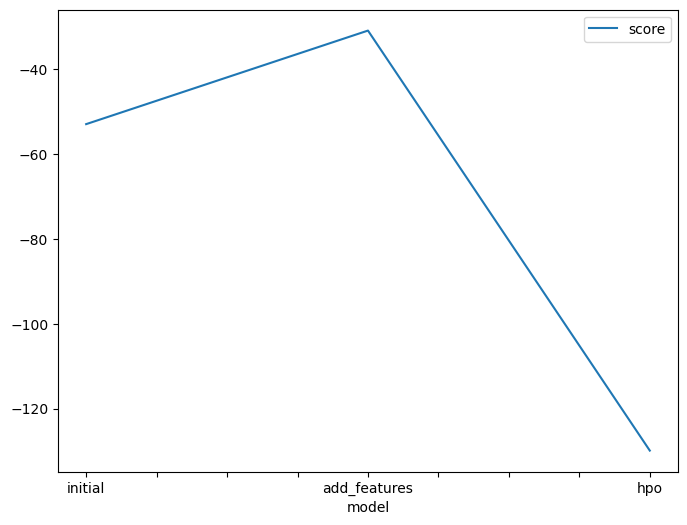

In [56]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.012300  ,  -30.979329   ,  -129.894453 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

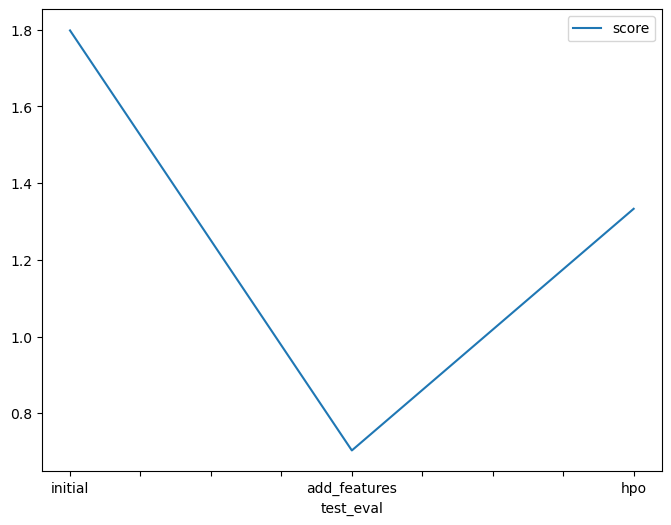

In [57]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [  1.79833 ,   0.70291    ,  1.33318   ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [58]:
# The 3 hyperparameters we tuned with the kaggle score as the result
report = pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "timelimit (seconds)": [10*60,10*60,12*60],
    "presets": ["best_quality", "best_quality", "best_quality"],
    "others": [np.NaN, np.NaN, "nn:activation|dropout_prob; gmb:num_boost_round|num_leaves; scheduler; searcher"],
    "score": [  1.79833 ,   0.70291    ,  1.33318   ]
})
report

,model,timelimit (seconds),presets,others,score
0,initial,600,best_quality,NaN,1.79833
1,add_features,600,best_quality,NaN,0.70291
2,hpo,720,best_quality,nn:activation|dropout_prob; gmb:num_boost_round|num_leaves; scheduler; searcher,1.33318
